<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
#load the dataset and split it directly
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [ ]:
#Normalise the dataset 
train_images = train_images/255.0 
test_images = test_images/255.0

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

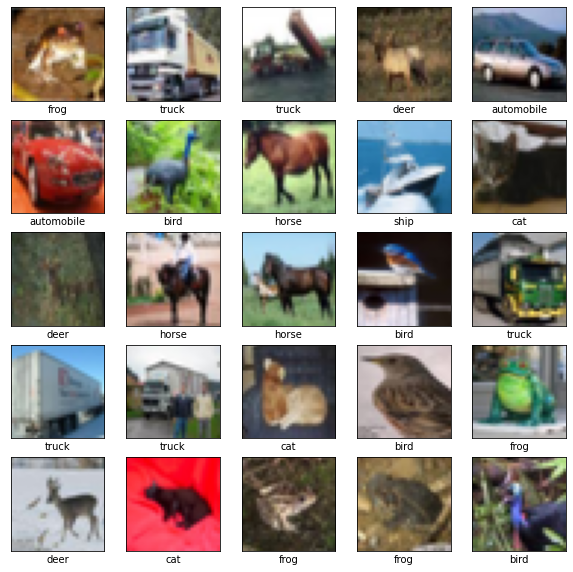

In [ ]:
#Visualise the dataset to see whether the images are labeled correctly
figure = plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap='gray')
  plt.xlabel(class_name[train_labels[i][0]])

In [ ]:
#After visulazing the data and check whether the images are labeled correctly we can go ahead and build our model,
#We'll make use of the sequential api in this case
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(train_images[0].shape)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(128,(3,3), activation='relu'))

In [ ]:
#Add the fully connected layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))#Use a softmax classifier for the output because it is a multi-class classification 
#We have 10 classes in our dataset and 10 classes to classify  

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="SGD", metrics=['accuracy'])

In [ ]:
#Let us now see the architecture of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

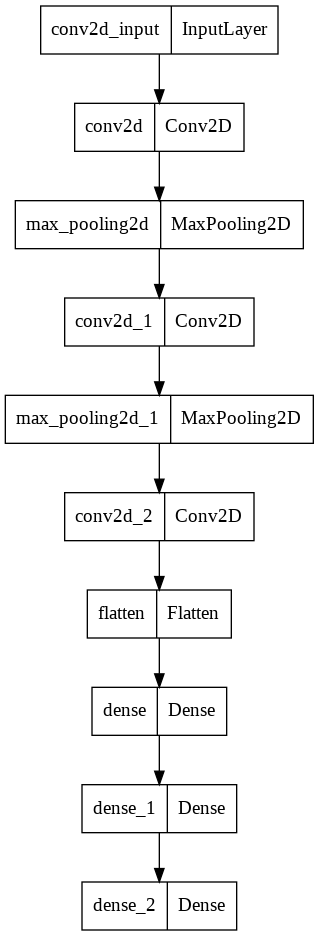

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
#Define the checkpoint and callback function
checkpoint = "train.ckpt"
call_back = tf.keras.callbacks.ModelCheckpoint(checkpoint,verbose=1,save_best_only=True) 

In [ ]:
#train the model
history = model.fit(train_images,train_labels,epochs=15,validation_data=[test_images,test_labels], verbose=1,callbacks=[call_back])

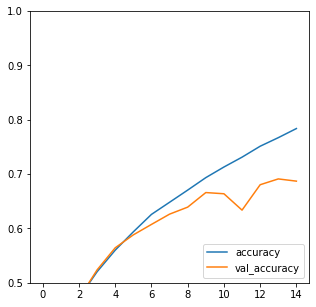

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.ylim(0.5,1)
plt.legend(loc='lower right')
#Blue is the training accuracy  while the orange one is the validation accuracy

In [ ]:
#Evaluate the model
loss , accuracy = model.evaluate(test_images, test_labels, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.9319 - accuracy: 0.6870


In [ ]:
#Our accuracy in percentage
accuracy * 100

68.69999766349792

Text(0, 0.5, 'accuracy')

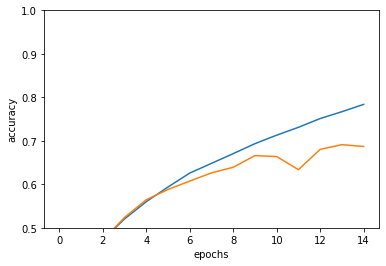

In [ ]:
#We visualise the model's perfomance
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.ylim(0.50,1)
plt.xlabel('epochs')
plt.ylabel('accuracy')

Image classification: 
In an image classification task, the model has the task of assigning a class label to the input it receives.
Here we build the sequential model add and  load the data off disk.
We'll follow the typical machine learning pipeline, which includes:
1. Examining and understanding the data. ie.: Make sure the data is relevant to your problem.
2. Build an input pipeline i.e: various data pre-processing techniques.
3. Build the model.  
4. Train the model.
5. Test the model.
6. Improve the model and repeat the process. i.e:Analyze the errors and improve the model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import  os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
#Download and explore the dataset
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count =  len(list(data_dir.glob("*/*.jpg")))

In [ ]:
image_count #Total of three thousand six hundred and seventy images downloaded

3670

In [ ]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
roses = len(list(data_dir.glob('roses/*')))

In [ ]:
roses = list(data_dir.glob('roses/*'))

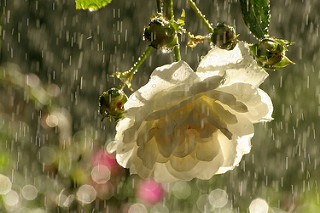

In [ ]:
PIL.Image.open(roses[0])

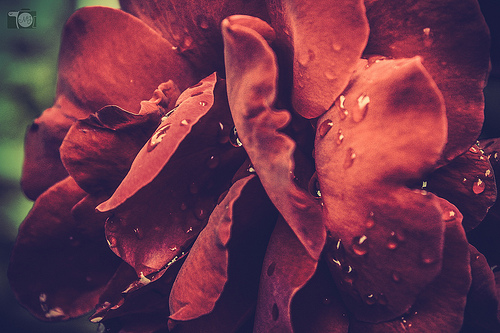

In [ ]:
PIL.Image.open(roses[1])

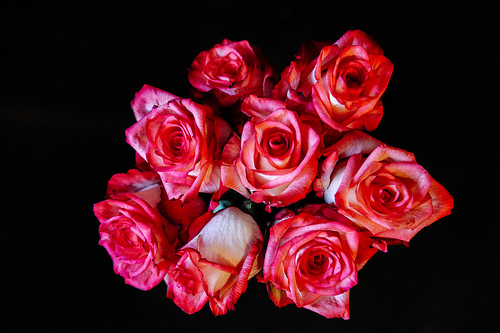

In [ ]:
PIL.Image.open(roses[5])

In [ ]:
tulips = list(data_dir.glob('tulips/*'))

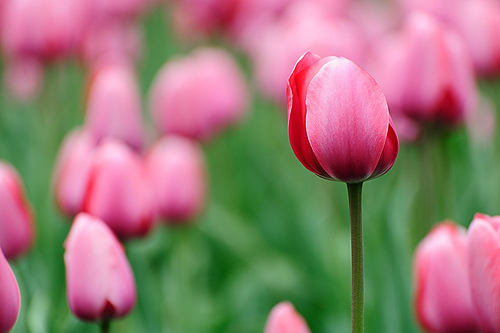

In [ ]:
PIL.Image.open(tulips[2])

In [ ]:
sunflower = list(data_dir.glob('sunflower/*'))

In [ ]:
#PIL.Image.open(sunflower[0])

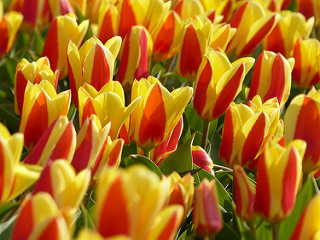

In [ ]:
PIL.Image.open(str(tulips[0]))

In [ ]:
#PIL.Image.open(str(sunflower[0]))

Loading data using keras utility 


In [ ]:
#Create a dataset 
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
#Split the dataset
#We'll split the dataset into two i.e : train and test/validation set, 80% of the data will be used for training,
#20% will be used for testing and validation
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2, #20% of the data has been used for validation
    subset ="training",
    seed=123,
    image_size= (img_height, img_width), #dimensions of the image  based on height and width
    batch_size = batch_size
    )

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
class_names = train_dataset.class_names

In [ ]:
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


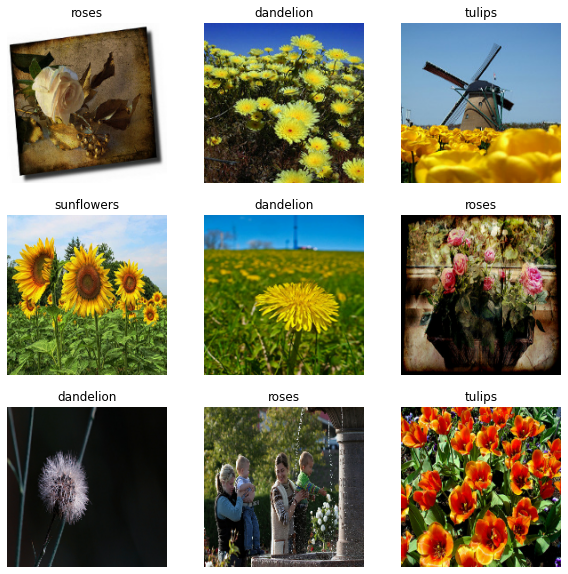

In [ ]:
#Visualise the data 
#First nine images from the training dataset
plt.figure(figsize=(10,10))
for image,labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i + 1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis('off')
    plt.yticks([])
    plt.xticks([])

In [ ]:
#We can manually iterate over the dataset and get the shape of the images 
for batch_images, labels_batch in train_dataset:
  print(batch_images.shape) #This is batch sample of 32 images of height 180 and width  180 and has 3 channels Red,Green and Blue
  print(labels.shape) #The are the corresponding labels for the 32 images
  break
#Caching data to disk

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [ ]:
#The RGB values are 3 channels of pixel values in 2D arrays  that range from 0 to 255 
#We should make our input small i.e change the values to be floating point numbers in between zero and one
normalization_layer = tf.keras.layers.Rescaling(1./255)

Image classification with tensorflow

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
#We'll use a dataset that contains 3,700 photos of flowers that has 5 subdirectories where by each directory  represent the five different classes
#One directory per class

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:
#Check the length of the images downloaded  
image_count = len(list(data_dir.glob('*/*.jpg')))

In [ ]:
image_count

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))

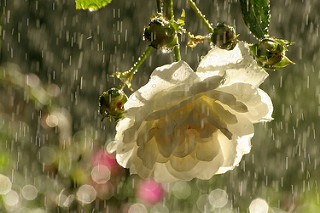

In [ ]:
PIL.Image.open(roses[0])

In [ ]:
tulips = list(data_dir.glob('tulips/*'))

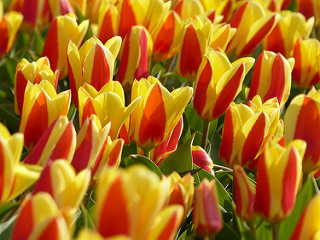

In [ ]:
PIL.Image.open(tulips[0])

In [ ]:
#Create a dataset
#Start by defining the image dimensions 
batch_size = 32
img_height = 180
img_width = 180  

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2, 
    subset ="training",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size 
) #We  have split the data into two 20% testing and 80% training

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
validation_data = tf.keras.utils.image_dataset_from_directory(
data_dir,
validation_split = 0.2,
seed = 123,
subset =  "validation",
batch_size = batch_size,
image_size = (img_height,img_width)
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
#The class names can be found like this
class_names = train_dataset.class_names

In [ ]:
#Print out the class names
class_names
#You can see that we have a total of five classes 

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

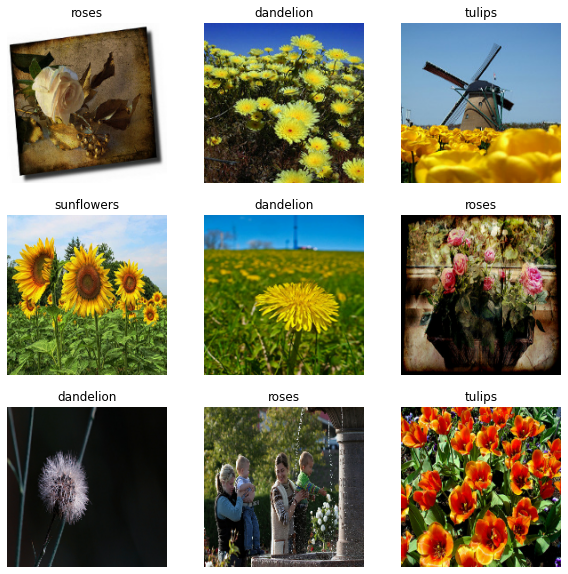

In [ ]:
#We can now visualize the data
figure =plt.figure(figsize = (10,10))
for images,labels in train_dataset.take(1):
  for i in range(9):
    figure.add_subplot(3,3,i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

All the images are correctly labeled

In [ ]:
#We cam manually iterate over the dataset and get the images
for images, labels in train_dataset:
  print(images.shape) #Here we can see the shape of the images which are 32 images of 180 height and 180 width, together with 3 channels
  print(labels.shape) #These are the corresponding labels to the select images(32 images called the batch sample) 
  break

(32, 180, 180, 3)
(32,)


In [ ]:
#Cache the data to memory before training 
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [ ]:
#Our images are colored which means  that they are pilxel values between 0  to 255  found in 3 channels RGB 
#We have to turn them into gray scale values in between zero and one

In [ ]:
normalizing_layer = tf.keras.layers.Rescaling(1./255) #We turn the pixel values in the images to be floatin point numbers in between zero and one

In [ ]:
normalized_dataset = train_dataset.map(lambda x,y:(normalizing_layer(x),y))

In [ ]:
#We make the normalized dataset iterable
image_batch, labels_batch = next(iter(normalized_dataset))

In [ ]:
first_image = image_batch[0]

In [ ]:
np.min(first_image) #Prints out the minimum value in the image/2D matrix(tables of rows and columns)

0.0

In [ ]:
np.max(first_image)#Prints out the maximum values in the image/2D matrix(table of rows and columns)

0.99167764

In [ ]:
#the total size/length of our classes
num_classes = len(class_names)
#Define the size of the image 
num_channels = 3
image_size = (img_height, img_width,num_channels)

In [ ]:
#We build the computational graph to train our model on 
model = tf.keras.models.Sequential([
tf.keras.layers.Rescaling(1./255, input_shape=(image_size)),
tf.keras.layers.Conv2D(16,(3,3),activation='relu'), #This is th first convolution layer that has around 16 features to be learned from
tf.keras.layers.MaxPooling2D((2,2)),#Add a max pooling layer to down sample the image and reduce the spatial invariance
tf.keras.layers.Conv2D(32,(3,3)),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Conv2D(64,(3,3)),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Conv2D(128,(3,3)),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(300,kernel_initializer="he_normal"),
tf.keras.layers.Activation('elu'), 
tf.keras.layers.Dense(100,kernel_initializer='he_normal'),
tf.keras.layers.Activation('elu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(num_classes),
])

In [ ]:
#Compile the model: define the hyperparameters
#model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),#optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
 #          optimizer='Adam',  metrics = ['accuracy'])

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,nesterov=True),metrics=['accuracy']) 

In [ ]:
#Define the callback functions and the checkpoints 
check_point = "train_model_one/cp-{epoch:04d}.ckpt"
call_back = tf.keras.callbacks.ModelCheckpoint(check_point,verbose=1, save_freq=5 * batch_size, save_weights_only=True)
model.save_weights(check_point.format(epoch=0)) 
#We have defined a callback that saves the model after every five seconds

In [ ]:
#Train the model 
model.fit(train_dataset, epochs=20,callbacks=[call_back],verbose =1,validation_data=[validation_data] )

Epoch 1/20
92/92 [==============================] - 8s 68ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 1.2509 - val_accuracy: 0.6512
Epoch 2/20
66/92 [====================>.........] - ETA: 1s - loss: 0.0075 - accuracy: 1.0000
Epoch 2: saving model to train_model_one/cp-0002.ckpt
92/92 [==============================] - 5s 58ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.2764 - val_accuracy: 0.6526
Epoch 3/20
92/92 [==============================] - 5s 58ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 1.2738 - val_accuracy: 0.6485
Epoch 4/20
43/92 [=============>................] - ETA: 2s - loss: 0.0065 - accuracy: 1.0000
Epoch 4: saving model to train_model_one/cp-0004.ckpt
92/92 [==============================] - 5s 58ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.2858 - val_accuracy: 0.6499
Epoch 5/20
92/92 [==============================] - 5s 56ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.3024 - val_accuracy: 0.6362
Epoch 6/20
19/92 [===

Text(0.5, 1.0, 'Model accuracy per epoch')

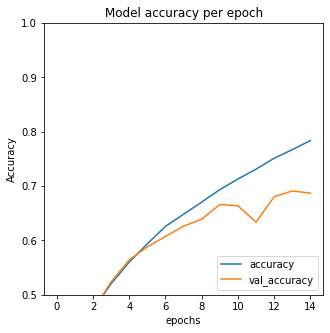

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(loc= 'lower right')
plt.ylim(0.5,1)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Model accuracy per epoch')

In [ ]:
!pip install "fastapi[all]"